<a href="https://colab.research.google.com/github/chidichukwu/umojahack/blob/main/Cryptojackingk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center> Welcome to the UmojaHack Africa 2023 Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

<a name="Libraries"></a>
## 1. Importing Libraries


In [96]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

<a name="Data"></a>
## 2. Loading Data

In [97]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

# Preview train dataset
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [98]:
# Preview test dataset
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [99]:
# Preview sample submission file
samplesubmission.head()

,ID,Target
0,ID_VT5SH34X8O,0
1,ID_4RQRV7XN3E,0
2,ID_1XCH999D2E,0
3,ID_J2ZBZIO0RW,0
4,ID_KG3PE5VXCN,0


In [100]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

<a name="Statistics"></a>
## 3. Statistical Summaries

In [101]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [102]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [103]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

In [104]:
total_time = train['Time on processor'].sum()
train['I/O Operation/Byte'] = train['I/O Data Operations'] / train[' I/O Data Bytes']
train['CPU Utilisation'] = train['Time on processor'] / total_time
train['Disk Usage'] = train['Disc Writing/sec'] + train['Disk Reading/sec']
train['I/O Bytes per Subprocess'] = train[' I/O Data Bytes']/train['Number of subprocesses']
train['Page Fault rate'] = train['Pages Read/sec'] / train['Page Errors/sec']
train['Network Activity'] =  train['Bytes Sent/sent'] + train['Received Bytes (HTTP)'] + train['Network packets sent'] +  train['Network packets received']

In [105]:
tot_time = test['Time on processor'].sum()
test['I/O Operation/Byte'] = test['I/O Data Operations'] / test[' I/O Data Bytes']
test['CPU Utilisation'] = test['Time on processor'] / tot_time
test['Disk Usage'] = test['Disc Writing/sec'] + test['Disk Reading/sec']
test['I/O Bytes per Subprocess'] = test[' I/O Data Bytes']/test['Number of subprocesses']
test['Page Fault rate'] = test['Pages Read/sec'] / test['Page Errors/sec']
test['Network Activity'] =  test['Bytes Sent/sent'] + test['Received Bytes (HTTP)'] + test['Network packets sent'] +  test['Network packets received']

In [106]:
data_impute = train.replace(r'^\s*$', np.nan, regex=True)

In [107]:
operation = 'I/O Operation/Byte'
data_impute['I/O Operation/Byte'].fillna(data_impute['I/O Operation/Byte'].mean(), inplace=True)
test['I/O Operation/Byte'].fillna(data_impute['I/O Operation/Byte'].mean(), inplace=True)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

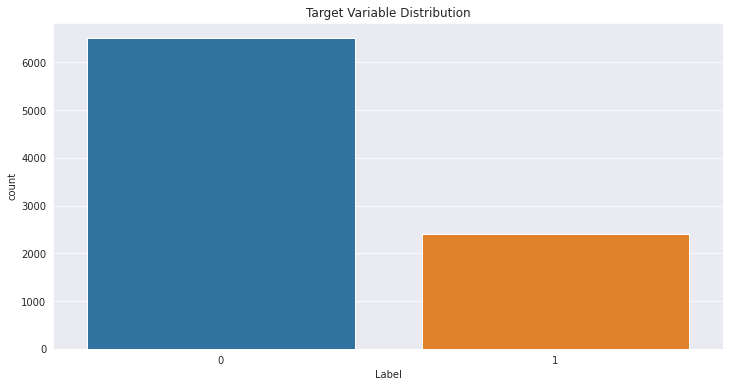

In [108]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

There is a class imbalance in our dataset

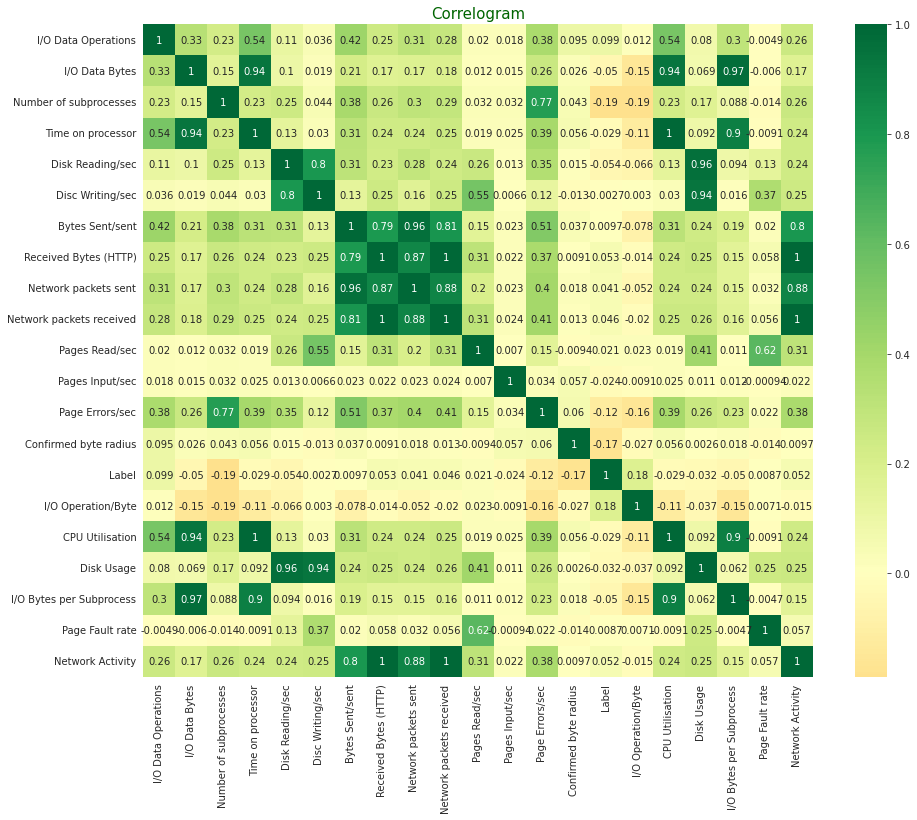

In [109]:
# Plotting a heatmap to show correlations between variables
corr = train.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Most features are not strongly correlated with the target

In [110]:
X = data_impute.drop(columns='Label')
y = data_impute['Label']

y

0       1
1       0
2       0
3       0
4       1
       ..
8903    1
8904    0
8905    0
8906    0
8907    0
Name: Label, Length: 8908, dtype: int64

In [111]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
X_res,y_res = rus.fit_resample(X,y)
x = pd.DataFrame(X_res)
y = pd.DataFrame(y_res)

data_impute = pd.concat([x,y], axis = 1)
data_impute

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,...,Pages Input/sec,Page Errors/sec,Confirmed byte radius,I/O Operation/Byte,CPU Utilisation,Disk Usage,I/O Bytes per Subprocess,Page Fault rate,Network Activity,Label
0,ID_3K8VB5OVBQ,3.866414,1391.642394,29.0,0.000000,5.288543,0.088883,92.660612,184.143522,1.133259,...,0.0,965.336919,22.683266,0.002778,0.000000,5.377426,47.987669,0.000069,279.248419,0
1,ID_G43G109108,0.000000,0.000000,26.0,0.000000,0.466527,0.000000,53.495121,42.054096,0.688683,...,0.0,258.789312,22.753377,0.003149,0.000000,0.466527,0.000000,0.000000,96.793290,0
2,ID_N49D8PR4BY,6.909666,3230.257929,28.0,0.034715,0.999791,0.000000,46.679129,42.613312,0.688745,...,0.0,405.515212,27.091203,0.002139,0.000008,0.999791,115.366355,0.000000,90.603278,0
3,ID_7O91ZQR3WE,1.555378,1207.484593,28.0,0.034718,3.355173,0.000000,148.094231,67.059023,0.933227,...,0.0,310.653481,30.610335,0.001288,0.000008,3.355173,43.124450,0.000215,216.797512,0
4,ID_CWB1V42I3Y,1.044721,166.799639,27.0,0.000000,0.489018,0.000000,78.798603,148.394775,0.911352,...,0.0,277.228824,28.808970,0.006263,0.000000,0.489018,6.177764,0.000000,228.904941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,ID_AKGXY41K1H,47.827710,73713.107310,33.0,0.417567,31.901310,3.176802,2366.917285,48359.121000,17.727887,...,0.0,14595.093910,25.390180,0.000649,0.000094,35.078112,2233.730525,0.000067,50779.532962,1
4804,ID_8ABPXYH94Q,5.206184,1206.473153,25.0,0.000000,1.201427,0.000000,232.616322,5503.457480,2.803330,...,0.0,354.741392,31.260762,0.004315,0.000000,1.201427,48.258926,0.000000,5742.881889,1
4805,ID_3X7WT3VBKL,19.030549,19895.240670,32.0,0.156090,5.694180,0.024974,1982.973263,951.902089,2.747192,...,0.0,2000.105752,30.391505,0.000957,0.000035,5.719155,621.726271,0.000062,2939.970145,1
4806,ID_9O3VPYAFMZ,4.998256,1087.620442,27.0,0.034710,0.444289,0.000000,8.241568,19.304374,0.155501,...,0.0,363.251010,22.952369,0.004596,0.000008,0.444289,40.282239,0.000000,27.856945,1


<a name="Preprocess"></a>
## 6. Modeling

In [112]:
#scale numerical features for logistic model
#features = data_impute.drop(columns=['ID','Label']).columns
features = data_impute.drop(columns=['ID','I/O Operation/Byte','Label','CPU Utilisation','I/O Bytes per Subprocess','Disk Usage','Page Fault rate','Network Activity']).columns
target = 'Label'

features
# define standard scaler
scaler = StandardScaler()

# transform data
data_impute[features] = scaler.fit_transform(data_impute[features])
data_impute[features] = scaler.transform(data_impute[features])

In [113]:
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    stratify=train[target], #to account for class imbalance
                                                    test_size=0.3,
                                                    random_state=SEED)

In [114]:
#fit logistic regression model on rrain data
model = LogisticRegression()
model.fit(X_train, y_train['Label'])

#make predictions on validation set
preds = model.predict(X_test)

In [115]:
#check performance of the model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1952
           1       0.72      0.08      0.15       721

    accuracy                           0.74      2673
   macro avg       0.73      0.54      0.50      2673
weighted avg       0.74      0.74      0.66      2673



In [116]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
predictions = xgb_classifier.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 1, 0])

In [117]:
#check performance of the model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1952
           1       0.97      0.92      0.94       721

    accuracy                           0.97      2673
   macro avg       0.97      0.95      0.96      2673
weighted avg       0.97      0.97      0.97      2673



# svm

In [118]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier

classifier= SVC()

otr = OneVsRestClassifier(classifier)
otr.fit(X_train, y_train['Label'])

ypredtr=otr.predict(X_test)
print (classification_report(y_test,ypredtr))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1952
           1       0.90      0.01      0.02       721

    accuracy                           0.73      2673
   macro avg       0.82      0.51      0.44      2673
weighted avg       0.78      0.73      0.62      2673



In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', model), ('rf', rnd_clf), ('svc', classifier)],
    voting='hard')

voting_clf.fit(X_train, y_train)
predict=voting_clf.predict(X_test)

print (classification_report(y_test,predict))
#for clf in (model, rnd_clf, classifier, voting_clf):
 #   clf.fit(X_train, y_train)
  #  y_pred = clf.predict(X_test)
   # print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


              precision    recall  f1-score   support

           0       0.75      1.00      0.85      1952
           1       0.98      0.08      0.14       721

    accuracy                           0.75      2673
   macro avg       0.86      0.54      0.50      2673
weighted avg       0.81      0.75      0.66      2673



In [120]:
#make predictions on test set
test['Target'] = model.predict(test[features])

In [121]:
sub = test[['ID', 'Target']]

In [122]:
sub.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,0
3,ID_DNQXNVTXHE,0
4,ID_8CRTF1BJOD,0


In [123]:
sub.to_csv('UHA_23_crypto.csv', index=False)